In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("US_County_Level_Presidential_Results_12-16.csv")
county_facts = pd.read_csv("county_facts.csv")
df08 = pd.read_csv("US_County_Level_Presidential_Results_08-16.csv")

In [4]:
df.head(30)

,Unnamed: 0,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,per_dem_2016,per_gop_2016,diff_2016,per_point_diff_2016,state_abbr,county_name,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,per_dem_2012,per_gop_2012,diff_2012,per_point_diff_2012
0,0,2013,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2050,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2060,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2068,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2070,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2090,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2100,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2105,93003.0,130413.0,246588.0,0.377159,0.528870,37410,-0.151711,AK,Alaska,2105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Unnamed: 0              0
combined_fips           0
votes_dem_2016          0
votes_gop_2016          0
total_votes_2016        0
per_dem_2016            0
per_gop_2016            0
diff_2016               0
per_point_diff_2016     0
state_abbr              0
county_name             0
FIPS                    0
total_votes_2012       29
votes_dem_2012         29
votes_gop_2012         29
county_fips            29
state_fips             29
per_dem_2012           29
per_gop_2012           29
diff_2012              29
per_point_diff_2012    29
dtype: int64

In [6]:
df.shape

(3141, 21)

In [7]:
df.loc[df['state_abbr'] == "CA"].shape

(58, 21)

In [8]:
county_facts.loc[county_facts['fips'] == 1003]

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6


In [9]:
df.loc[df['FIPS'] == 1003]

,Unnamed: 0,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,per_dem_2016,per_gop_2016,diff_2016,per_point_diff_2016,state_abbr,county_name,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,per_dem_2012,per_gop_2012,diff_2012,per_point_diff_2012
30,30,1003,18409.0,72780.0,94090.0,0.195653,0.773515,54371,-0.577862,AL,Baldwin County,1003,84988.0,18329.0,65772.0,3.0,1.0,0.215666,0.773897,47443.0,-0.558232


In [10]:
gop_wins_2016 = df.loc[df['per_gop_2016'] > df['per_dem_2016']]

In [11]:
gop_wins_2016.shape #(2654, 21)

(2654, 21)

In [12]:
gop_wins_2016.loc[gop_wins_2016["per_gop_2012"] < gop_wins_2016["per_dem_2012"]]['state_abbr'].value_counts()
#219 counties voted R in 2016 while they voted D in 2012.

IA    31
WI    23
NY    20
MN    19
IL    12
MI    12
OH     9
ME     8
VA     7
NC     7
SC     6
GA     6
WA     5
IN     5
SD     5
CO     4
FL     4
ND     4
MS     4
NH     3
MT     3
PA     3
NM     3
NJ     2
AL     2
OR     2
KY     2
DE     1
VT     1
AR     1
NE     1
TX     1
RI     1
TN     1
CT     1
Name: state_abbr, dtype: int64

In [13]:
dem_wins_2016 = df.loc[df['per_gop_2016'] < df['per_dem_2016']]

In [14]:
dem_wins_2016.loc[dem_wins_2016["per_gop_2012"] > dem_wins_2016["per_dem_2012"]]['state_abbr'].value_counts()
#20 counties voted D in 2016 while they voted R in 2012.

CA    4
GA    3
NE    2
UT    2
PA    2
TX    2
NC    1
WA    1
MD    1
VA    1
MT    1
Name: state_abbr, dtype: int64

In [15]:
county_facts.loc[county_facts['area_name'] == "Big Horn County"]

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
1627,30003,Big Horn County,MT,13282,12865,3.2,12865,10.3,33.5,11.4,50.8,31.9,0.4,64.4,0.5,0.0,2.8,5.6,29.6,91.4,1.2,29.9,84.5,15.5,630,18.6,4661,67.4,8.5,89300,3444,3.70,15695,39966,25.5,217,2332,4.5,499,563,0.0,10.8,0.0,0.0,0.0,0.0,0,0,87369,6852,13590,4,4995.46,2.6
3173,56003,Big Horn County,WY,11930,11668,2.2,11668,6.5,25.3,19.2,49.7,95.9,0.9,1.3,0.4,0.0,1.4,9.1,87.8,87.7,2.6,7.1,89.1,21.2,1061,17.5,5366,75.7,6.5,131000,4462,2.59,25119,52589,10.2,301,2664,-0.4,868,1103,0.0,0.0,0.0,0.0,0.0,30.3,0,0,71008,6242,5611,13,3137.10,3.7


In [16]:
df['combined_fips']

0        2013
1        2016
2        2020
3        2050
4        2060
5        2068
6        2070
7        2090
8        2100
9        2105
10       2110
11       2122
12       2130
13       2150
14       2164
15       2170
16       2180
17       2185
18       2188
19       2195
20       2198
21       2220
22       2230
23       2240
24       2261
25       2270
26       2275
27       2282
28       2290
29       1001
        ...  
3111    54097
3112    54099
3113    54101
3114    54103
3115    54105
3116    54107
3117    54109
3118    56001
3119    56003
3120    56005
3121    56007
3122    56009
3123    56011
3124    56013
3125    56015
3126    56017
3127    56019
3128    56021
3129    56023
3130    56025
3131    56027
3132    56029
3133    56031
3134    56033
3135    56035
3136    56037
3137    56039
3138    56041
3139    56043
3140    56045
Name: combined_fips, Length: 3141, dtype: int64

In [17]:
df_merged = pd.merge(df, county_facts, how='inner', left_on="FIPS", right_on="fips",
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)

In [18]:
df_merged.head()

,Unnamed: 0,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,per_dem_2016,per_gop_2016,diff_2016,per_point_diff_2016,state_abbr,county_name,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,per_dem_2012,per_gop_2012,diff_2012,per_point_diff_2012,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,29,1001,5908.0,18110.0,24661.0,0.239569,0.734358,12202,-0.494789,AL,Autauga County,1001,23909.0,6354.0,17366.0,1.0,1.0,0.265758,0.726337,11012.0,-0.460580,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1,30,1003,18409.0,72780.0,94090.0,0.195653,0.773515,54371,-0.577862,AL,Baldwin County,1003,84988.0,18329.0,65772.0,3.0,1.0,0.215666,0.773897,47443.0,-0.558232,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
2,31,1005,4848.0,5431.0,10390.0,0.466603,0.522714,583,-0.056112,AL,Barbour County,1005,11459.0,5873.0,5539.0,5.0,1.0,0.512523,0.483376,334.0,0.029147,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
3,32,1007,1874.0,6733.0,8748.0,0.214220,0.769662,4859,-0.555441,AL,Bibb County,1007,8391.0,2200.0,6131.0,7.0,1.0,0.262186,0.730664,3931.0,-0.468478,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,76.3,22.1,0.4,0.2,0.1,0.9,2.1,74.5,86.6,1.2,2.1,77.5,12.1,1327,27.6,8978,79.0,7.3,90500,7091,3.03,17427,36447,18.1,275,3145,7.5,1126,1385,14.9,0.0,0.0,0.0,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
4,33,1009,2150.0,22808.0,25384.0,0.084699,0.898519,20658,-0.813820,AL,Blount County,1009,23980.0,2961.0,20741.0,9.0,1.0,0.123478,0.864929,17780.0,-0.741451,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,96.0,1.8,0.6,0.3,0.1,1.2,8.7,87.8,88.7,4.3,7.3,77.0,12.1,4540,33.9,23826,81.0,4.5,117100,21108,2.70,20730,44145,15.8,660,6798,3.4,3563,4458,0.0,0.0,0.0,0.0,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


In [19]:
df['combined_fips'] == df['FIPS']

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
3111    True
3112    True
3113    True
3114    True
3115    True
3116    True
3117    True
3118    True
3119    True
3120    True
3121    True
3122    True
3123    True
3124    True
3125    True
3126    True
3127    True
3128    True
3129    True
3130    True
3131    True
3132    True
3133    True
3134    True
3135    True
3136    True
3137    True
3138    True
3139    True
3140    True
Length: 3141, dtype: bool

In [20]:
df08.head()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196


In [21]:
df08['per_dem_2008'] = df08['dem_2008']/df08['total_2008']

In [22]:
df08['per_gop_2008'] = df08['gop_2008']/df08['total_2008']

In [23]:
county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [24]:
county_facts.loc[county_facts['area_name'] == 'Alabama']

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4


In [25]:
from sklearn.decomposition import PCA

In [26]:
def doPCA():
    pca = PCA(n_components = 2)
    pca.fit(data)
    return pca



# PCA ANALYSIS

In [27]:
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
### Defining Necessary Functions
def rotate(array):
    data = [
        [1, 0, 0],
        [0, np.sqrt(3) / 2, -np.sqrt(1) / 2],
        [0, np.sqrt(1) / 2, np.sqrt(3) / 2]]
    rot = np.matrix(data=data).T
    return np.array(np.matrix(array) * rot)


def plot_vec(array, length, color='blue', alpha=1):
    kwargs = dict(
        color=color,  # color of the curve
        linewidth=1.4,  # thickness of the line
        # linestyle='--',  # available styles - -- -. :
        alpha=alpha,
    )
    ax.plot(*zip(-array[0] * length, array[0] * length), **kwargs)


def plot_plane(normal, color='blue', alpha=0.2, x_min=-1.5, x_max=2.5, y_min=-2.5, y_max=1.5):
    x_min_rng = list(range(int(np.floor(x_min) + 1), 0))
    x_max_rng = list(range(int(np.floor(x_max))))
    y_min_rng = list(range(int(np.floor(y_min) + 1), 0))
    y_max_rng = list(range(int(np.floor(y_max))))
    surf_x, surf_y = np.meshgrid(
        [x_min] + x_min_rng + x_max_rng + [x_max],
        [y_min]+ y_min_rng + y_max_rng + [y_max])
    surf_z = (-normal[0, 0]*surf_x - normal[0, 1]*surf_y - 0.5)* 1. / normal[0, 2]
    ax.plot_surface(surf_x, surf_y, surf_z, color=color, alpha=0.1)
    
    
def project2vec(data, vec, id_=0, color='green', along=False):
    pp = data[[id_]]
    proj = (np.sum(vec*pp)*vec)
    ax.scatter( *( proj.ravel() ), color=color, s=16)
    kwargs = dict(
        color=color,  # colour of the curve
        linewidth=1.4,  # thickness of the line
        # linestyle='--',  # available styles - -- -. :
        alpha=0.5,
    )
    ax.plot(*(zip(pp[0], proj[0])), **kwargs)
    if along:
        along_kwargs = dict(
            color='Dark' + color,  # colour of the curve
            linewidth=1.4,  # thickness of the line
            # linestyle='--',  # available styles - -- -. :
            alpha=1,
        )
        ax.plot(*(zip(np.array([0,0,0]), proj[0])), **along_kwargs)
    return np.sum(vec*pp)

def project2plane(data, normal, id_=0, color='green', shoot=False):
    pp = data[[id_]]
    proj = pp - np.sum((pp * normal)) * normal
    ax.scatter(*proj.ravel(), color=color, s=16)
    if shoot:
        kwargs = dict(
            color=color,  # colour of the curve
            linewidth=1.4,  # thickness of the line
            # linestyle = '--',  # available styles - -- -. :
            alpha=0.5,
        )
        ax.plot(*(zip(pp[0], proj[0])), **kwargs)
    return pp - np.sum(normal * pp) * normal    
    
def plot_origin():
    ax.scatter(0, 0, 0, marker='o', s=26, color='black', alpha=1)
    
def plotModel(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    margin = 0.5
    x_min = x.min() - margin
    x_max = x.max() + margin
    y_min = y.min() - margin
    y_max = y.max() + margin
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    col_dict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', col_dict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters ans true labels
    plt.scatter(x, y, c=label, edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ## if it's a SVM model
    if hasattr(model, 'support_'):
        # if it's a SVC, plot the support vectors
        index = model.support_
        plt.scatter(x[index], y[index], c=label[index], s=150, alpha=0.5, edgecolors='k')

In [105]:
ncf = pd.read_csv('PCA-CLUSTER-Data.csv')

In [106]:
ncf = ncf.ix[:,'PST045214':]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [107]:
ncf.head()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,Outcome_2016,Outcome_2012
0,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8,1,1
1,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,1,1
2,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0,1,0
3,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,76.3,22.1,0.4,0.2,0.1,0.9,2.1,74.5,86.6,1.2,2.1,77.5,12.1,1327,27.6,8978,79.0,7.3,90500,7091,3.03,17427,36447,18.1,275,3145,7.5,1126,1385,14.9,0.0,0.0,0.0,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8,1,1
4,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,96.0,1.8,0.6,0.3,0.1,1.2,8.7,87.8,88.7,4.3,7.3,77.0,12.1,4540,33.9,23826,81.0,4.5,117100,21108,2.70,20730,44145,15.8,660,6798,3.4,3563,4458,0.0,0.0,0.0,0.0,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9,1,1


In [108]:
ncf.shape

(3141, 53)

In [112]:
ncf = ncf._get_numeric_data()
# numeric data only

In [115]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ncf_scaled = pd.DataFrame(scaler.fit_transform(ncf), columns=ncf.columns)
ncf_scaled.head()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,Outcome_2016,Outcome_2012
0,0.005467,0.005550,0.205784,0.005550,0.368852,0.514451,0.198770,0.797753,0.772582,0.219741,0.005423,0.025943,0.007874,0.061224,0.026151,0.759162,0.697959,0.028269,0.036611,0.751852,0.248596,0.017851,0.547739,0.006519,0.771505,0.084264,0.127830,0.006203,0.301754,0.294119,0.329539,0.214149,0.003226,0.002663,0.403730,0.003115,0.003885,0.227886,0.000000,0.022968,0.0,0.008974,0.564057,0.000000,0.0,0.005022,0.148552,0.003546,0.003270,0.004072,0.001321,1.0,1.0
1,0.019772,0.018555,0.298109,0.018555,0.336066,0.427746,0.299180,0.790262,0.870351,0.112808,0.007592,0.021226,0.007874,0.054422,0.046025,0.836649,0.638776,0.063604,0.057531,0.816667,0.344101,0.058328,0.540201,0.030818,0.715054,0.247716,0.163443,0.022676,0.235088,0.334971,0.295691,0.248566,0.019236,0.014471,0.412507,0.017451,0.018182,0.040480,0.005571,0.017668,0.0,0.016667,0.485765,0.008331,0.0,0.024905,0.212450,0.017578,0.034548,0.010912,0.001650,1.0,1.0
2,0.002649,0.002788,0.165740,0.002788,0.344262,0.398844,0.254098,0.617978,0.478215,0.559342,0.006508,0.011792,0.015748,0.030612,0.044979,0.455497,0.693878,0.051237,0.052301,0.531481,0.143258,0.006386,0.507538,0.003374,0.649194,0.107614,0.076171,0.002838,0.284211,0.150028,0.126403,0.493308,0.001832,0.001740,0.361492,0.001634,0.001592,0.000000,0.000000,0.000000,0.0,0.000000,0.480427,0.000000,0.0,0.001581,0.078391,0.000000,0.000200,0.006068,0.000446,1.0,0.0
3,0.002216,0.002326,0.169077,0.002326,0.311475,0.393064,0.219262,0.591760,0.755579,0.259694,0.004338,0.004717,0.007874,0.030612,0.019874,0.747644,0.730612,0.021201,0.021967,0.601852,0.125000,0.003995,0.582915,0.002564,0.801075,0.074112,0.077599,0.002185,0.414035,0.161158,0.160985,0.328872,0.001086,0.000828,0.433352,0.001190,0.001323,0.223388,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.001047,0.071832,0.000433,0.000474,0.004265,0.000530,1.0,1.0
4,0.005697,0.005830,0.196885,0.005830,0.377049,0.468208,0.264344,0.764045,0.964931,0.021152,0.006508,0.007075,0.007874,0.040816,0.088912,0.886911,0.773469,0.075972,0.076360,0.592593,0.125000,0.013684,0.741206,0.006827,0.827957,0.045685,0.106837,0.006524,0.298246,0.222632,0.236269,0.284895,0.002606,0.001789,0.410861,0.003767,0.004258,0.000000,0.000000,0.000000,0.0,0.000000,0.412811,0.002018,0.0,0.002684,0.069579,0.000842,0.000075,0.004418,0.001280,1.0,1.0


In [116]:
from sklearn.decomposition import PCA
pca = PCA()

In [117]:
pca.set_params()
pca.fit(ncf_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [118]:
pca.components_

array([[  2.07687989e-02,   2.05595168e-02,   1.10266923e-02, ...,
          1.09287118e-02,  -5.82285271e-01,  -6.81060930e-01],
       [ -8.87674684e-03,  -8.88056182e-03,  -2.03929082e-02, ...,
         -4.10787027e-03,   8.23624379e-02,   2.51020810e-01],
       [  4.84303129e-02,   4.73194542e-02,   9.00997517e-02, ...,
          1.99165784e-02,  -4.51941287e-02,   3.85436134e-01],
       ..., 
       [ -1.62126019e-02,   1.01610467e-02,  -5.23566236e-04, ...,
         -2.82304150e-04,  -2.40441169e-05,   2.09193618e-05],
       [ -7.99373212e-01,   4.06481675e-01,   1.16173030e-03, ...,
          4.00842145e-03,  -2.87537353e-05,   1.92079939e-05],
       [ -6.78074749e-04,   7.07608591e-01,   3.48228132e-08, ...,
          1.71647461e-05,   1.16538621e-06,  -1.09960277e-06]])

In [119]:
pca.mean_ 

array([ 0.01002593,  0.0100032 ,  0.19428606,  0.01000265,  0.36057745,
        0.43796755,  0.27607111,  0.74220023,  0.8490605 ,  0.10848783,
        0.02440882,  0.03302863,  0.0084155 ,  0.06484135,  0.09214179,
        0.77493278,  0.72636233,  0.07985686,  0.09678113,  0.73244426,
        0.23249636,  0.02040629,  0.46685913,  0.01223211,  0.70940099,
        0.1258476 ,  0.12207668,  0.01138357,  0.23745706,  0.27638834,
        0.2537861 ,  0.30169418,  0.00939194,  0.00964811,  0.39592228,
        0.00774273,  0.00839205,  0.03585838,  0.00822485,  0.01414721,
        0.00152211,  0.02168344,  0.31946895,  0.00839211,  0.00589642,
        0.01046206,  0.12668757,  0.00776509,  0.0083107 ,  0.00771426,
        0.0037312 ,  0.84495384,  0.77236549])

In [138]:
ncf_scaled_pca = pca.transform(ncf_scaled)
ncf_scaled_pca

array([[ -1.79139396e-01,   8.71434133e-02,   1.85692301e-01, ...,
          6.36513481e-04,  -4.93881250e-05,  -2.22412611e-07],
       [ -2.18756729e-01,  -1.10190811e-01,   2.21538411e-01, ...,
          6.82390381e-05,  -2.82494615e-04,  -3.09123956e-06],
       [  6.40191375e-01,   4.25127402e-01,  -4.12917057e-01, ...,
          1.51639455e-05,   2.97962859e-06,   7.71300685e-07],
       ..., 
       [ -2.91700080e-01,  -8.02265629e-02,   2.05517409e-01, ...,
         -1.29241659e-06,  -9.24568122e-05,   5.21605734e-07],
       [ -2.79605238e-01,  -1.39578772e-01,   1.97681631e-01, ...,
         -5.87484791e-04,   1.86620915e-05,  -6.15108234e-07],
       [ -3.27842872e-01,  -2.03242125e-01,   1.21048906e-01, ...,
          7.50482760e-05,  -1.05602866e-04,  -4.35803203e-07]])

In [280]:
# PCA with only 3 components
pca.set_params(n_components=2)
pca.fit(ncf_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [281]:
ncf_scaled_2 = pca.fit_transform(ncf_scaled)

In [282]:
ncf_scaled_2.shape

(3141, 2)

In [283]:
ncf_scaled.shape

(3141, 53)

In [284]:
pca.explained_variance_ratio_

array([ 0.43307555,  0.12432763])

In [285]:
### so it seems that after the first three variables, the variance within variables drops off

In [286]:
ncf_scaled_2[:, 2]

IndexError: index 2 is out of bounds for axis 1 with size 2

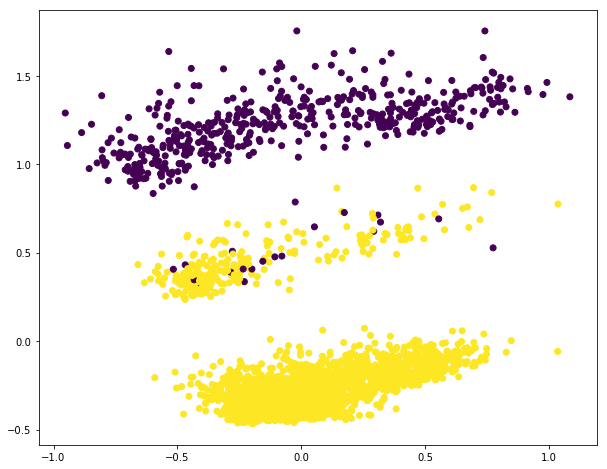

In [287]:
plt.scatter(ncf_scaled_2[:, 1], ncf_scaled_2[:, 0], c=ncf_scaled.loc[:,['Outcome_2016']])
plt.show()

In [187]:
import sklearn.linear_model as lm
logit = lm.LogisticRegression(C=1e10) 
logit.fit(ncf_scaled_2, ncf_scaled.loc[:,['Outcome_2016']])

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [188]:
logit.score(ncf_scaled_2, ncf_scaled.loc[:,['Outcome_2016']])

0.99331423113658068

In [142]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.43307555,  0.55740318,  0.64666581,  0.7203307 ,  0.77133289,
        0.81284121,  0.84820136,  0.87414527,  0.8941245 ,  0.91037874,
        0.92520096,  0.93557939,  0.9433432 ,  0.94997766,  0.95576861,
        0.96061251,  0.9650936 ,  0.96935453,  0.9726849 ,  0.97585642,
        0.97882506,  0.98145128,  0.98349417,  0.98543554,  0.98717642,
        0.98875532,  0.99031707,  0.99159168,  0.99281077,  0.99380263,
        0.99473945,  0.99554344,  0.99630978,  0.99701393,  0.99764169,
        0.99817899,  0.99863805,  0.9990781 ,  0.99936554,  0.99959263,
        0.99975128,  0.99986324,  0.99992347,  0.99995206,  0.99997134,
        0.99998597,  0.99999339,  0.99999816,  0.99999901,  0.99999964,
        0.99999988,  1.        ,  1.        ])

In [189]:
pca.set_params(n_components=None)
pca.fit(ncf_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

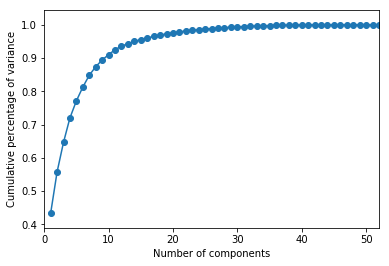

In [190]:
plt.scatter(range(1, 54), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, 54), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 52)
plt.show()

In [48]:
## ADDING A D OR R FOR A SPAM STYLE PCA ANALYSIS 

In [51]:
ncf_scaled.shape

(3195, 51)

array([[  3.44473929e-01,   3.75082355e-01,   6.19186317e-02, ...,
          5.78156473e-05,   1.28321709e-05,   3.88922101e-08],
       [  2.85504337e-01,   3.29128304e-02,  -2.52311436e-01, ...,
         -3.79924357e-04,   2.21578218e-05,   1.37875192e-07],
       [  1.26752537e-01,   1.45175479e-01,  -2.54734404e-01, ...,
          1.34231996e-06,  -1.43973315e-06,  -2.93072547e-08],
       ..., 
       [ -1.37513192e-01,   1.41176013e-01,   1.14777323e-01, ...,
          1.22975176e-05,  -4.55831625e-06,   3.11970291e-08],
       [ -1.32533643e-01,   2.03331992e-01,   5.02024435e-02, ...,
          1.46269788e-05,   5.92414325e-07,   1.01805981e-08],
       [ -2.24314655e-01,   1.89120946e-01,  -1.45852262e-01, ...,
         -3.29224349e-07,  -1.38227788e-06,  -5.89517880e-10]])

In [271]:
ncf_x.head()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0.005467,0.005550,0.205784,0.005550,0.368852,0.514451,0.198770,0.797753,0.772582,0.219741,0.005423,0.025943,0.007874,0.061224,0.026151,0.759162,0.697959,0.028269,0.036611,0.751852,0.248596,0.017851,0.547739,0.006519,0.771505,0.084264,0.127830,0.006203,0.301754,0.294119,0.329539,0.214149,0.003226,0.002663,0.403730,0.003115,0.003885,0.227886,0.000000,0.022968,0.0,0.008974,0.564057,0.000000,0.0,0.005022,0.148552,0.003546,0.003270,0.004072,0.001321
1,0.019772,0.018555,0.298109,0.018555,0.336066,0.427746,0.299180,0.790262,0.870351,0.112808,0.007592,0.021226,0.007874,0.054422,0.046025,0.836649,0.638776,0.063604,0.057531,0.816667,0.344101,0.058328,0.540201,0.030818,0.715054,0.247716,0.163443,0.022676,0.235088,0.334971,0.295691,0.248566,0.019236,0.014471,0.412507,0.017451,0.018182,0.040480,0.005571,0.017668,0.0,0.016667,0.485765,0.008331,0.0,0.024905,0.212450,0.017578,0.034548,0.010912,0.001650
2,0.002649,0.002788,0.165740,0.002788,0.344262,0.398844,0.254098,0.617978,0.478215,0.559342,0.006508,0.011792,0.015748,0.030612,0.044979,0.455497,0.693878,0.051237,0.052301,0.531481,0.143258,0.006386,0.507538,0.003374,0.649194,0.107614,0.076171,0.002838,0.284211,0.150028,0.126403,0.493308,0.001832,0.001740,0.361492,0.001634,0.001592,0.000000,0.000000,0.000000,0.0,0.000000,0.480427,0.000000,0.0,0.001581,0.078391,0.000000,0.000200,0.006068,0.000446
3,0.002216,0.002326,0.169077,0.002326,0.311475,0.393064,0.219262,0.591760,0.755579,0.259694,0.004338,0.004717,0.007874,0.030612,0.019874,0.747644,0.730612,0.021201,0.021967,0.601852,0.125000,0.003995,0.582915,0.002564,0.801075,0.074112,0.077599,0.002185,0.414035,0.161158,0.160985,0.328872,0.001086,0.000828,0.433352,0.001190,0.001323,0.223388,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.001047,0.071832,0.000433,0.000474,0.004265,0.000530
4,0.005697,0.005830,0.196885,0.005830,0.377049,0.468208,0.264344,0.764045,0.964931,0.021152,0.006508,0.007075,0.007874,0.040816,0.088912,0.886911,0.773469,0.075972,0.076360,0.592593,0.125000,0.013684,0.741206,0.006827,0.827957,0.045685,0.106837,0.006524,0.298246,0.222632,0.236269,0.284895,0.002606,0.001789,0.410861,0.003767,0.004258,0.000000,0.000000,0.000000,0.0,0.000000,0.412811,0.002018,0.0,0.002684,0.069579,0.000842,0.000075,0.004418,0.001280


In [216]:
ncf.shape

(3141, 53)

In [ ]:
## TESTING AND TRAINING DATA

In [269]:
ncf_x = ncf_scaled.iloc[:,0:51]

In [270]:
ncf_y_16 = ncf_scaled.iloc[:,51]
ncf_y_12 = ncf_scaled.iloc[:,52]

In [252]:
import random

In [253]:
random.seed(0)

In [289]:
msk = np.random.rand(len(ncf_x)) < 0.8
x_train = ncf_x[msk]
x_test = ncf_x[~msk]

msk16 = np.random.rand(len(ncf_y_16)) < 0.8
train_y16 = ncf_y_16[msk16]
test_y16 = ncf_y_16[~msk16]

msk12 = np.random.rand(len(ncf_y_12)) < 0.8
train_y12 = ncf_y_12[msk12]
test_y12 = ncf_y_12[~msk12]

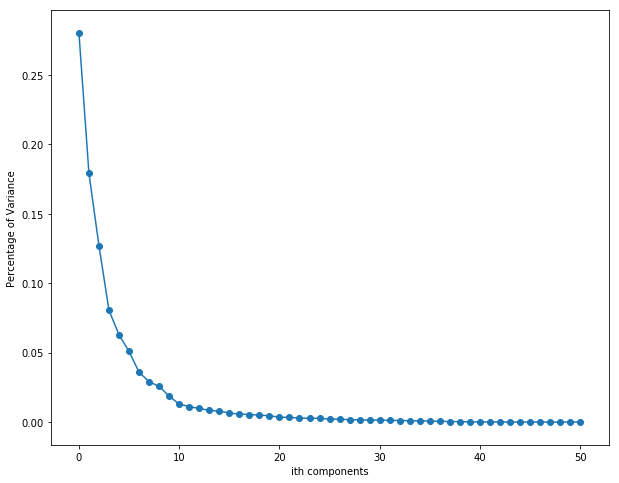

In [290]:
pca.set_params(n_components=None)
pca.fit(x_train)
plt.plot(range(57), pca.explained_variance_ratio_)
plt.scatter(range(57), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [295]:
pca.set_params(n_components=2).fit(x_train)
x_train2 = pca.transform(x_train)

In [296]:
pca.explained_variance_ratio_

array([ 0.28043551,  0.17926991])

In [297]:
np.sum(pca.explained_variance_ratio_)

0.45970542070323883

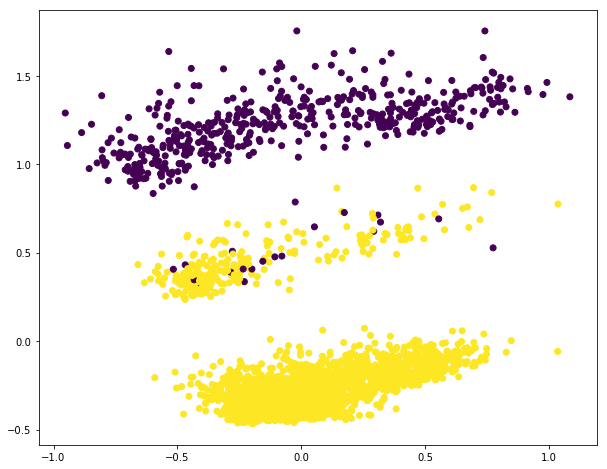

In [299]:
plt.scatter(ncf_scaled_2[:, 1], ncf_scaled_2[:, 0], c=ncf_scaled.loc[:,['Outcome_2016']])
plt.show()

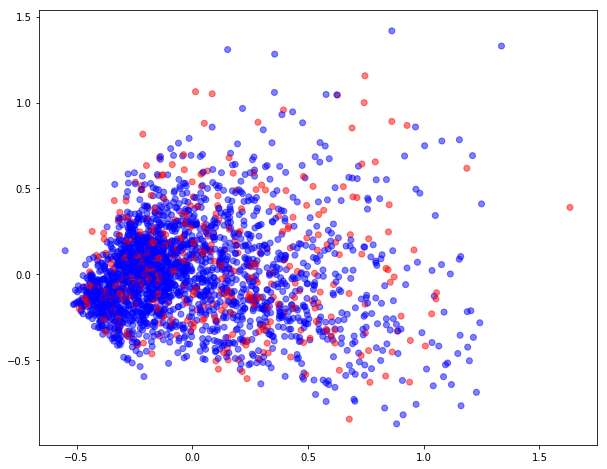

In [302]:
plt.scatter(x_train2[:, 0], x_train2[:, 1], c=['red' if i == 0 else 'blue' for i in train_y16 ], alpha=0.5)
plt.show()

In [ ]:
# CLUSTER ANALYSIS NEEDS TO BE WITH VARIANCE VARIABLES ONLY

In [68]:
from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()

In [69]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [95]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def plot_silhouette(km, X):
    y_km = kmeans.fit_predict(ncf_scaled)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(ncf_scaled, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster c, and sort them
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()

        size_cluster_c = len(c_silhouette_vals)
        y_ax_upper += size_cluster_c
        color = cm.jet(i*1.0/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, color=color)

        # Compute the new y_ax_lower for next plot
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += size_cluster_c

    # The vertical line for average silhouette score of all the values
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')

    plt.yticks(yticks, cluster_labels + 1)
    plt.title('Silhouette Analysis')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

In [86]:
kmeans.set_params(n_clusters=2)
kmeans.fit(ncf_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
kmeans.cluster_centers_

array([[  3.46110009e-04,   3.50113464e-04,   1.92683660e-01,
          3.49842372e-04,   4.11206020e-01,   5.24129617e-01,
          3.50794058e-01,   8.78680968e-01,   9.28568069e-01,
          4.06156826e-02,   1.56227661e-02,   2.36971167e-02,
          1.56250988e-03,   6.14887596e-02,   5.76696140e-02,
          8.86159617e-01,   7.34047159e-01,   5.60944424e-02,
          6.31710587e-02,   7.68625216e-01,   2.36772250e-01,
          3.94597197e-04,   4.63187829e-01,   3.65227464e-04,
          7.91417050e-01,   1.16129547e-01,   1.41167225e-01,
          3.63735168e-04,   3.24056699e-01,   2.89964388e-01,
          2.64586851e-01,   2.67467762e-01,   3.52867141e-04,
          3.34609175e-04,   3.94874839e-01,   3.22344689e-04,
          3.46401115e-04,   7.73707428e-03,   3.46517620e-03,
          7.04168871e-03,   1.78753300e-04,   6.43375975e-03,
          2.96084322e-01,   3.60031405e-04,   2.66671766e-04,
          3.49238683e-04,   1.27474118e-01,   2.88822464e-04,
        

In [88]:
sum(kmeans.labels_)

904

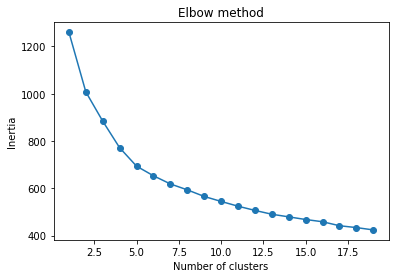

In [89]:
plot_inertia(kmeans, ncf_scaled, range(1, 20))

In [77]:
## so it seems like when clustering, 2 groups is going to be the best

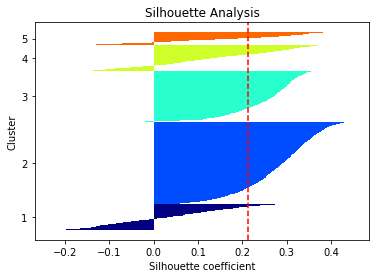

In [96]:
kmeans.set_params(n_clusters = 5)
plot_silhouette(kmeans, ncf_scaled)